**Big Mart Sales Prediction**

**Introduction**

Problem Statement:
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

Let's Breakdown the Problem Statement:
This will be a Supervised machine learning problem.
The target value will be Item_Outlet_Sales.

**Objective**


The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [ ]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#load data
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [ ]:
#check the head
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#check the shape of train and test
train.shape

(8523, 12)

In [ ]:
test.shape

(5681, 11)

In [ ]:
#check for null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#combining the train and test data to perform EDA with both the data sets combined
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train, test], ignore_index='True')

In [ ]:
data.shape

(14204, 13)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

we have null values in item weight - 2439 items, outlet size - 4016 items and item outlet sales - 5681 items which we will predict

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [ ]:
#printing unique values in the item fat column
data['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
#lets count values of the fat unique values
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

From the information we can tell that items with low fat content are the most with 9185 items grouped in the low fat followed by 5019 items grouped in the regular fat content  

In [ ]:
#printing unique values in the Outlet_Establishment_Year column
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [ ]:
#calculate the outlet age
data['outlet_age'] = 2023 - data['Outlet_Establishment_Year']


In [ ]:
#let us check the unique values in the outlet size column
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
#We can see that outlet with the size denoted medium has the highest count, we can fillna using the mode

data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
#Lets look at the item_weight column and replace missing values with the mean weight
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

<Axes: >

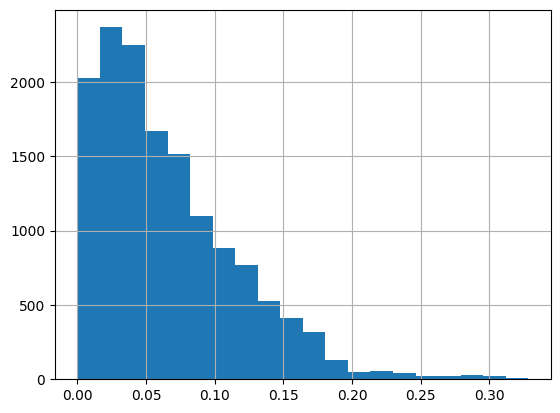

In [ ]:
#lets check the distribution of the item_visibility column

data['Item_Visibility'].hist(bins = 20)

Let's look out for outliers

In [ ]:
#lets look out for outliers
q1 = data['Item_Visibility'].quantile(0.25)

q3 = data['Item_Visibility'].quantile(0.75)

IQR = q3 - q1
IQR

0.06700157100000001

In [ ]:
fill_data = data.query('(@q1- 1.5*@IQR)<= Item_Visibility <= (@q3 + 1.5*@IQR)')

In [ ]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [ ]:
#lets check the shape of the data after dealing with outliers  in comparison to before dealin with the outliers
print(data.shape)
print(fill_data.shape)

(14204, 14)
(13943, 14)


From the information above we can tell that after removing the outliers we have 13943 rows and 14 columns as compared to before we worked on the outliers where we had 14204 rows and 14 columns

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'outlet_age'],
      dtype='object')

In [ ]:
#lets modify the item_visibilty column by converting the numerical values into categorical variables
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'], [0.00,0.065,0.13,0.2],labels = ['low visibility', 'visibility','high visibility'])

In [ ]:
data['Item_Visibility_bins'].unique()

['low visibility', NaN, 'visibility', 'high visibility']
Categories (3, object): ['low visibility' < 'visibility' < 'high visibility']

In [ ]:
data['Item_Visibility_bins'].value_counts()

low visibility     7363
visibility         4283
high visibility    1439
Name: Item_Visibility_bins, dtype: int64

In [ ]:
#lets fill the nan with the mode
data['Item_Visibility_bins'] = data['Item_Visibility_bins'].fillna(data['Item_Visibility_bins'].mode()[0])

In [ ]:
data['Item_Visibility_bins'].unique()

['low visibility', 'visibility', 'high visibility']
Categories (3, object): ['low visibility' < 'visibility' < 'high visibility']

In [ ]:
#lets code all categorical variables as numeric using the label encoder
#importing label encoder from sklearn preprocessing

from sklearn.preprocessing import LabelEncoder

In [ ]:
#creating the label encoder instance
le = LabelEncoder()

In [ ]:
#lets transform the Item_Fat_Content to
print(data['Item_Fat_Content'].value_counts())


data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
#lets transform Item_Visibility_bins

print(data['Item_Visibility_bins'].value_counts())

data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])

data['Item_Visibility_bins'].value_counts()

low visibility     8482
visibility         4283
high visibility    1439
Name: Item_Visibility_bins, dtype: int64


1    8482
2    4283
0    1439
Name: Item_Visibility_bins, dtype: int64

In [ ]:
#lets transform Outlet_Size and Outlet_Location_Type
#outlet size
print(data['Outlet_Size'].value_counts())

data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Size'].value_counts()

#outlet location type
print(data['Outlet_Location_Type'].value_counts())

data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Location_Type'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


2    5583
1    4641
0    3980
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#outlet type
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [ ]:
#lets create dummies for the outlet type column
dummy = pd.get_dummies(data['Outlet_Type'])

In [ ]:
dummy.head(2)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0


In [ ]:
#lets look at the item identifier column
data['Item_type_combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_type_combined'] = data['Item_type_combined'].map({'FD':'Food',
                                                             'NC': 'Non-consumable',
                                                             'DR': 'Drinks'})
data['Item_type_combined'].value_counts()

Food              10201
Non-consumable     2686
Drinks             1317
Name: Item_type_combined, dtype: int64

In [ ]:
#transform the Item_type_combined
data['Item_type_combined'] = le.fit_transform(data['Item_type_combined'])
data['Item_type_combined'].value_counts()

1    10201
2     2686
0     1317
Name: Item_type_combined, dtype: int64

In [ ]:
#lets drop all columns that we have converted to diffrent types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  outlet_age                 14204 non-null  int

In [ ]:
data.drop(['Item_Type','Outlet_Establishment_Year'], axis =1, inplace = True)

In [ ]:
#lets divide our data into train and test as earlier before
train = data[data['source']== 'train']
test = data[data['source'] == 'test']

In [ ]:
#drop unnecessary columns
test.drop(['Item_Outlet_Sales','source'] ,axis =1, inplace = True)
train.drop(['source'], axis = 1, inplace = True)

#export the data into different csv
test.to_csv('test_modified.csv', index = False)
train.to_csv('train_modified.csv', index = False)

<ipython-input-51-6c77479bab88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'] ,axis =1, inplace = True)
<ipython-input-51-6c77479bab88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'], axis = 1, inplace = True)


**Linear Regression**

In [ ]:
train2 = pd.read_csv('train_modified.csv')
test2 = pd.read_csv('test_modified.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   int64  
 3   Item_Visibility       8523 non-null   float64
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   int64  
 7   Outlet_Location_Type  8523 non-null   int64  
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  outlet_age            8523 non-null   int64  
 11  Item_Visibility_bins  8523 non-null   int64  
 12  Item_type_combined    8523 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 932.2+ KB


In [ ]:
#import the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#initiate train test split

X_train = train2.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Type'],axis = 1)
y_train = train2['Item_Outlet_Sales']



In [ ]:
X_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,outlet_age,Item_Visibility_bins,Item_type_combined
0,9.30,0,0.016047,249.8092,1,0,24,1,1
1,5.92,1,0.019278,48.2692,1,2,14,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print intercept and coefficient

print(lm.coef_)
print(lm.intercept_)

[ 9.39084724e-01  6.41622980e+01 -4.13498263e+03  1.53456454e+01
 -8.86430633e+01  1.32049559e+02  1.14729247e+01  1.01268006e+02
 -2.43265166e+01]
-177.36455298735427


In [ ]:
#lets predict test set of training data
pred = lm.predict(X_test)
pred

array([1834.74904003, 2831.44425319,  729.15061247, ..., 4189.17329287,
       2084.10543909, 4281.6515372 ])

In [ ]:
#measuring the RMSE of our model
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, pred)))

1398.4510896271925
